In [2]:
import numpy as np
import matplotlib.pyplot as plt
import speckleret

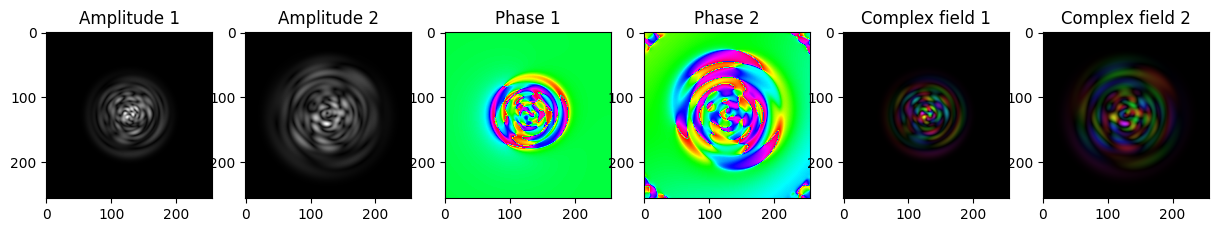

In [11]:
field = np.load('../imports/grin_speckle_example.npy')
ft = speckleret.transforms.fourier_transform(field, pad=2)
_ = speckleret.plots.compare_complex_fields(field, ft)

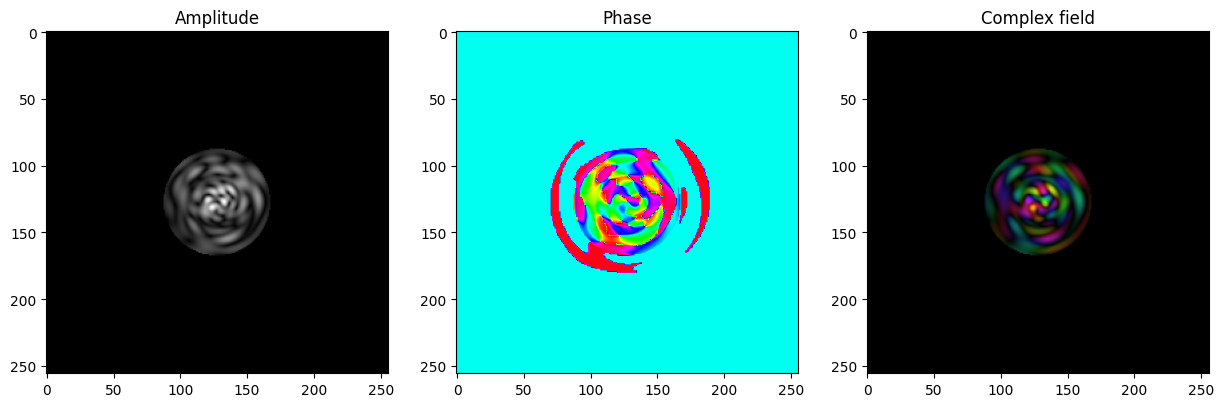

In [27]:
support = speckleret.supports.disk_support(field, radius=40)
supported_field = field * support
_ = speckleret.plots.complex_imshow(supported_field)

In [30]:
y_hat, ft_hat, results = speckleret.retrieval.hio_er_fourier((np.abs(field), np.abs(ft)), support, pad=2, max_iter=10, max_er_iter=200, max_hio_iter=100)

1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10


In [ ]:
print(f"Quality: {speckleret.metrics.quality(y_hat, field)}")
print(f"Pearson: {speckleret.metrics.pearson(y_hat, field)}")

plt.figure()
plt.plot(results['mse_plane2'], label='Fourier MSE')
plt.title('MSE')
plt.xlabel('Iteration #')
plt.yscale('log')

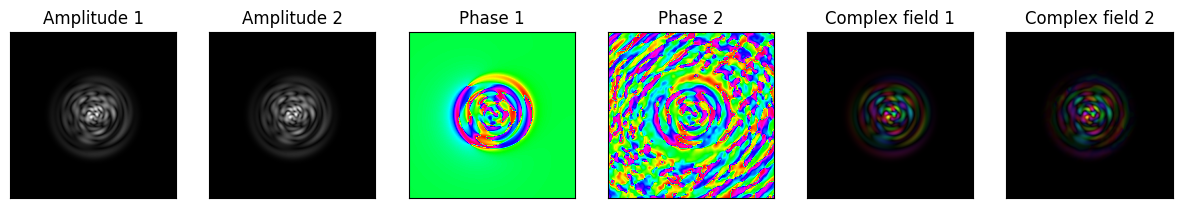

In [29]:
_ = speckleret.plots.compare_complex_fields(field, y_hat, remove_ticks=True)